The [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) I'm using contains 284,807 credit card transactions from September 2013. Out of these transactions, 492 are fraudulent. The variables included in this dataset are Time, Amount, and 28 other variables that are the result of a Principal Component Analysis (PCA), as well as whether the transaction was fraudulent or not. The goal is to create a model that can detect fraudulent credit card transactions. 

# Import data

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [506]:
df = pd.read_csv('creditcard.csv')

In [217]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [218]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


I'll look at the skewness of each feature. If a feature is too skewed, a transformation can be applied to make the distribution less skewed. This can make certain models be more stable and converge better. 

In [504]:
skewness = df.skew()
skewness

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

There are quite a few columns that are skewed, with skewness at least 2 in absolute value. I'll apply a Box-Cox transformation to those columns. Since a Box-Cox transformation requires the data to be positive, I'll first shift the values to be positive and then apply a Box-Cox transformation.

In [507]:
for col in df.columns[:-1]:
    if abs(skewness[col]) > 2:
        col_min = df[col].min()
        if col_min <= 0:
            df[col] -= (col_min - 1)
        df[col], lamb = boxcox(df[col])
        print(f'''Feature {col} now has skewness {df[col].skew():.4f} after a Box-Cox transformation with lambda = {lamb:.4f}.''')

Feature V1 now has skewness -0.1268 
              after a Box-Cox transformation with lambda = 13.6105.
Feature V2 now has skewness 0.8447 
              after a Box-Cox transformation with lambda = 5.6578.
Feature V3 now has skewness 0.0204 
              after a Box-Cox transformation with lambda = 8.8415.
Feature V5 now has skewness 0.5757 
              after a Box-Cox transformation with lambda = 2.4115.
Feature V7 now has skewness 2.2694 
              after a Box-Cox transformation with lambda = 0.9759.
Feature V8 now has skewness 2.5344 
              after a Box-Cox transformation with lambda = 6.7573.
Feature V12 now has skewness 0.1340 
              after a Box-Cox transformation with lambda = 6.4916.
Feature V17 now has skewness 0.6419 
              after a Box-Cox transformation with lambda = 2.9679.
Feature V20 now has skewness 1.8149 
              after a Box-Cox transformation with lambda = 1.7165.
Feature V21 now has skewness 1.5233 
              after a Box-Cox t

I'll look at the skewness of all the features after the transformations.

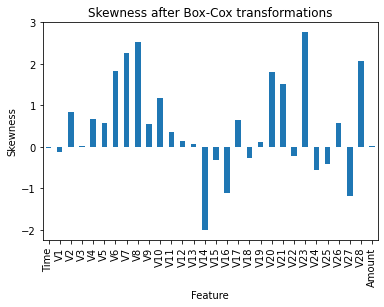

In [362]:
df.iloc[:,:-1].skew().plot.bar()
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.title('Skewness after Box-Cox transformations')
plt.show()

I'll also normalize each of the predictors to try to improve performance when fitting models.

In [363]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = df.columns[:-1]

Let's look at the distribution of non-frauds vs. frauds. Here, 0 indicates a non-fraud and 1 indicates a fraud.

In [222]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Because the classes are imbalanced, classification models might do poorly without addressing the imbalance first.

# Split the data

In order to treat the class imbalance, I'll try oversampling and undersampling. First, I'll split the data into training/validation/test before employing oversampling and undersampling only on the training set in order to avoid leakage of the test and validation data into the training data.

In [224]:
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=20)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=20)

Ensure that the validation and test sets have enough frauds in them.

In [365]:
y_train.value_counts()

Class
0    227441
1       404
Name: count, dtype: int64

In [318]:
y_valid.value_counts()

Class
0    28441
1       40
Name: count, dtype: int64

In [319]:
y_test.value_counts()

Class
0    28433
1       48
Name: count, dtype: int64

# Logistic regression models

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

Each model will be evaluated based on the area under the curve of the precision-recall curve. This metric is valuable for the context of the problem because we desire a high recall, to be able to catch fraudulent transactions, and at the same time high precision, to minimize the number of valid transactions that are classified as fraudulent. 

In [551]:
# show precision-recall curve, confusion matrix, and classification report
def eval_model(mod):
    
    
    if isinstance(mod, keras.src.engine.sequential.Sequential):
        y_pred_proba = mod.predict(X_valid).flatten()
    else:
        y_pred_proba = mod.predict_proba(X_valid)[:,1]
        
    y_pred = (y_pred_proba >= 0.5).astype(int)
    
    cm = confusion_matrix(y_valid, y_pred)
    classification_rep = classification_report(y_valid, y_pred)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # plotting precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba)
    auc_pr = auc(recall, precision)
    axes[0].plot(recall, precision, color='blue', lw=2, label=f'AUC-PR = {auc_pr:.4f}')
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')
    axes[0].set_title('Precision-Recall Curve')
    axes[0].legend(loc='lower left')

    # plotting confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')
    axes[1].set_title('Confusion Matrix')
    
    plt.show()
    
    print("\nClassification Report:\n", classification_rep)

## Logistic regression without over/undersampling

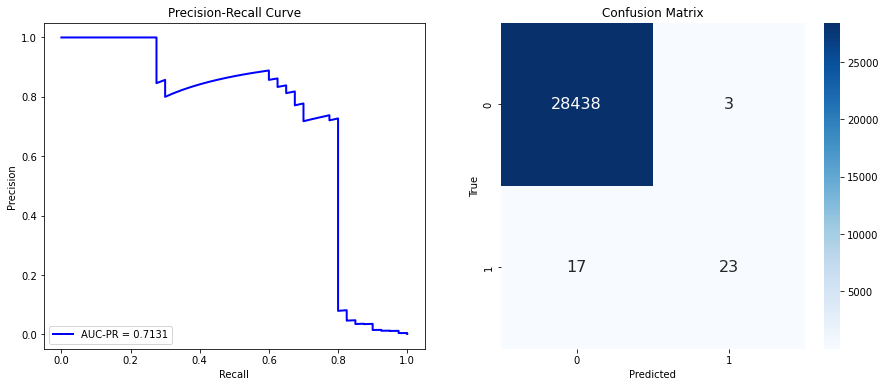


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.88      0.57      0.70        40

    accuracy                           1.00     28481
   macro avg       0.94      0.79      0.85     28481
weighted avg       1.00      1.00      1.00     28481



In [559]:
logi = LogisticRegression(penalty='l2', C=0.01)

logi.fit(X_train, y_train)

eval_model(logi)

## Logistic regression with oversampling

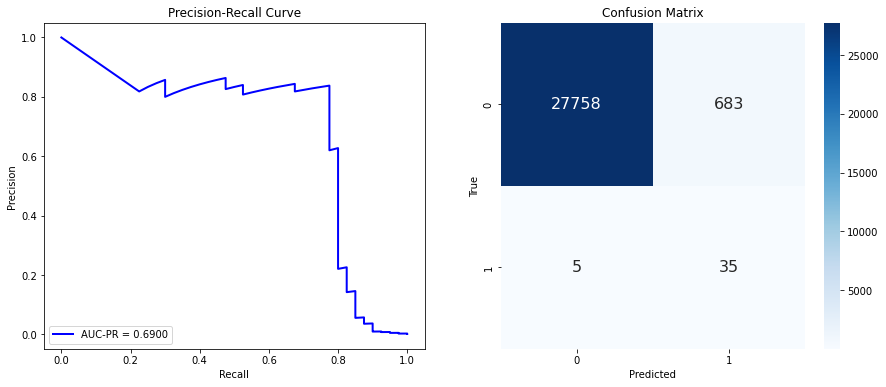


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     28441
           1       0.05      0.88      0.09        40

    accuracy                           0.98     28481
   macro avg       0.52      0.93      0.54     28481
weighted avg       1.00      0.98      0.99     28481



In [524]:
from imblearn.over_sampling import SMOTE
X_train_over, y_train_over = SMOTE(random_state=20).fit_resample(X_train, y_train)

model = LogisticRegression(penalty='l2', C=0.01)

model.fit(X_train_over, y_train_over)

eval_model(model)

## Logistic regression with undersampling

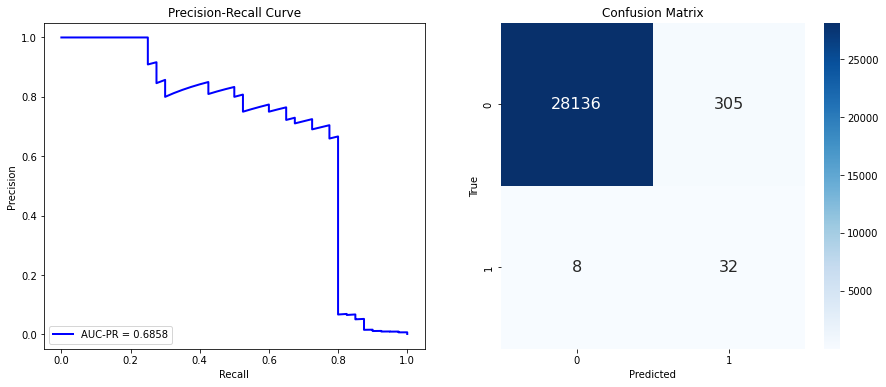


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     28441
           1       0.09      0.80      0.17        40

    accuracy                           0.99     28481
   macro avg       0.55      0.89      0.58     28481
weighted avg       1.00      0.99      0.99     28481



In [525]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=20) 

X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

model = LogisticRegression(penalty='l2', C=0.01)

model.fit(X_train_under, y_train_under)

eval_model(model)

Both oversampling and undersampling combined with a logistic regression capture more fraud, but they both incorrectly more valid transactions as fraud. I'll adjust the sampling strategies for both the oversampling and undersampling methods to see if they can perform better in terms of the area under the curve of precision-recall curve.

In [528]:
strategies = np.arange(0.1, 1.1, .1)
auc_prs = []
for strat in strategies:
    X_train_over, y_train_over = SMOTE(
        random_state=20, sampling_strategy=strat
    ).fit_resample(X_train, y_train)

    model = LogisticRegression(penalty='l2', C=0.01)
    model.fit(X_train_over, y_train_over)

    y_pred_proba = model.predict_proba(X_valid)[:,1]

    precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba)
    auc_pr = auc(recall, precision)
    
    auc_prs.append(auc_pr)
    
prec_rec_df = pd.DataFrame(
    {
        'Sampling Strategy' : strategies,
        'AUC-PR' : auc_prs
    }
)

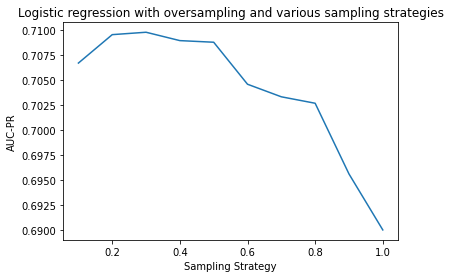

In [529]:
sns.lineplot(x = 'Sampling Strategy', y = 'AUC-PR', 
             data = prec_rec_df)
plt.title('Logistic regression with oversampling and various sampling strategies')
plt.show()

In [530]:
auc_prs = []
for strat in strategies:
    X_train_under, y_train_under = RandomUnderSampler(
        random_state=20, sampling_strategy=strat
    ).fit_resample(X_train, y_train)

    model = LogisticRegression(penalty='l2', C=0.01)
    model.fit(X_train_under, y_train_under)

    y_pred_proba = model.predict_proba(X_valid)[:,1]

    precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba)
    auc_pr = auc(recall, precision)
    
    auc_prs.append(auc_pr)
    
prec_rec_df = pd.DataFrame(
    {
        'Sampling Strategy' : strategies,
        'AUC-PR' : auc_prs
    }
)

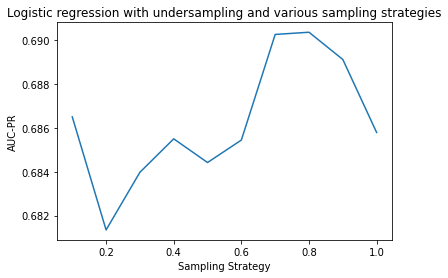

In [531]:
sns.lineplot(x = 'Sampling Strategy', y = 'AUC-PR', 
             data = prec_rec_df)
plt.title('Logistic regression with undersampling and various sampling strategies')
plt.show()

All the sampling strategies I tested for oversampling and undersampling do not perform as well as the logistic regression without any oversampling or undersampling in terms of the area under the precision-recall curve metric. 

# Tree-based models

Next, I'll try a couple of tree-based models (random forest, gradient boosting) to see if trees can capture the separation of the two classes better. 

## Random forest model

In [193]:
from sklearn.ensemble import RandomForestClassifier

The random forest model has several hyperparameters to be adjusted. I'll try a few combinations with a small number of trees to find a combination that minimizes the AUC-PR. Then these hyperparameters are used to build a bigger random forest with more trees.

In [570]:
for d in range(2, 6):
    for feats in ['sqrt', None]:
        model = RandomForestClassifier(
            n_estimators = 10,
            random_state = 20,
            max_depth = d,
            max_features = feats
        )
            
        model.fit(X_train, y_train)

        y_pred_proba = model.predict_proba(X_valid)[:,1]

        precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba)
        auc_pr = auc(recall, precision)
        print(f'Random forest with parameters {d}, {feats} for max_depth, max_features has validation AUC-PR of {auc_pr}.')

Random forest with parameters 2, sqrt, for max_depth, max_features has AUC-PR 0.5983841654324982.
Random forest with parameters 2, None, for max_depth, max_features has AUC-PR 0.720266792660481.
Random forest with parameters 3, sqrt, for max_depth, max_features has AUC-PR 0.6428558124845142.
Random forest with parameters 3, None, for max_depth, max_features has AUC-PR 0.7499570748363648.
Random forest with parameters 4, sqrt, for max_depth, max_features has AUC-PR 0.6709229480652277.
Random forest with parameters 4, None, for max_depth, max_features has AUC-PR 0.7378882064197099.
Random forest with parameters 5, sqrt, for max_depth, max_features has AUC-PR 0.6923738021300889.
Random forest with parameters 5, None, for max_depth, max_features has AUC-PR 0.7434155344126175.


In [571]:
rf = RandomForestClassifier(n_estimators = 100, 
                            random_state=20, 
                            verbose = 2,
                            max_depth = 3,
                            max_features = None)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.1min finished


RandomForestClassifier(max_depth=3, max_features=None, random_state=20,
                       verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


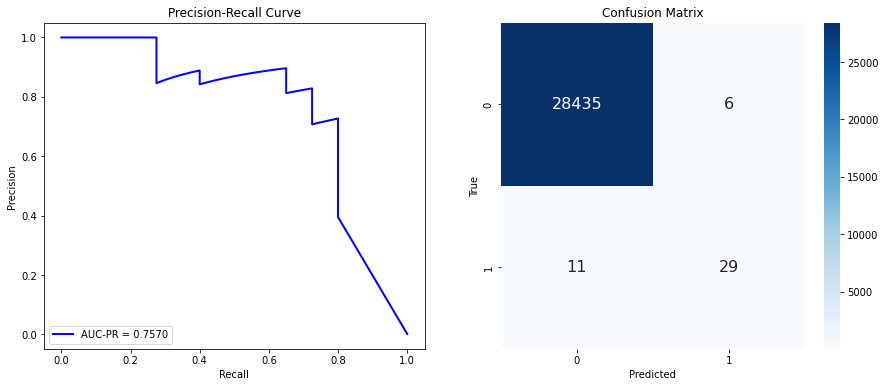


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.83      0.72      0.77        40

    accuracy                           1.00     28481
   macro avg       0.91      0.86      0.89     28481
weighted avg       1.00      1.00      1.00     28481



In [572]:
eval_model(rf)

## Gradient boosting model

In [573]:
from sklearn.ensemble import GradientBoostingClassifier

Like with the random forest model, I'll try a few combinations of hyperparameters for the gradient boosting model and then grow the best model with more trees.

In [575]:
for d in range(2, 6):
    for feats in ['sqrt', None]:
        for lr in [0.1, 0.05, 0.01, 0.005]:
            model = GradientBoostingClassifier(
                n_estimators = 10,
                random_state = 20,
                max_depth = d,
                max_features = feats,
                learning_rate = lr
            )
            
            model.fit(X_train, y_train)

            y_pred_proba = model.predict_proba(X_valid)[:,1]

            precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_proba)
            auc_pr = auc(recall, precision)
            print(f'Gradient boosting with parameters {d}, {feats}, {lr} for max_depth, max_features, learning rate has validation AUC-PR of {auc_pr}.')

Gradient boosting with parameters 2, sqrt, 0.1 for max_depth, max_features, learning rate has validation AUC-PR of 0.09659933686386679.
Gradient boosting with parameters 2, sqrt, 0.05 for max_depth, max_features, learning rate has validation AUC-PR of 0.6071782757636561.
Gradient boosting with parameters 2, sqrt, 0.01 for max_depth, max_features, learning rate has validation AUC-PR of 0.6677407550822619.
Gradient boosting with parameters 2, sqrt, 0.005 for max_depth, max_features, learning rate has validation AUC-PR of 0.6579722402145041.
Gradient boosting with parameters 2, None, 0.1 for max_depth, max_features, learning rate has validation AUC-PR of 0.15810634900284987.
Gradient boosting with parameters 2, None, 0.05 for max_depth, max_features, learning rate has validation AUC-PR of 0.6553560303286492.
Gradient boosting with parameters 2, None, 0.01 for max_depth, max_features, learning rate has validation AUC-PR of 0.6757505436293707.
Gradient boosting with parameters 2, None, 0.00

In [576]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, 
                                max_depth=3, max_features = None,
                                random_state=20,
                                verbose=2)

gb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0133           20.80m
         2           0.0131           20.47m
         3           0.0130           20.22m
         4           0.0128           20.08m
         5           0.0127           19.90m
         6           0.0125           19.70m
         7           0.0124           19.56m
         8           0.0123           19.39m
         9           0.0122           19.19m
        10           0.0121           18.97m
        11           0.0120           18.76m
        12           0.0119           18.59m
        13           0.0118           18.38m
        14           0.0117           18.18m
        15           0.0116           17.97m
        16           0.0115           17.79m
        17           0.0114           17.59m
        18           0.0113           17.39m
        19           0.0112           17.20m
        20           0.0112           16.98m
        21           0.0111           16.78m
        2

GradientBoostingClassifier(learning_rate=0.01, random_state=20, verbose=2)

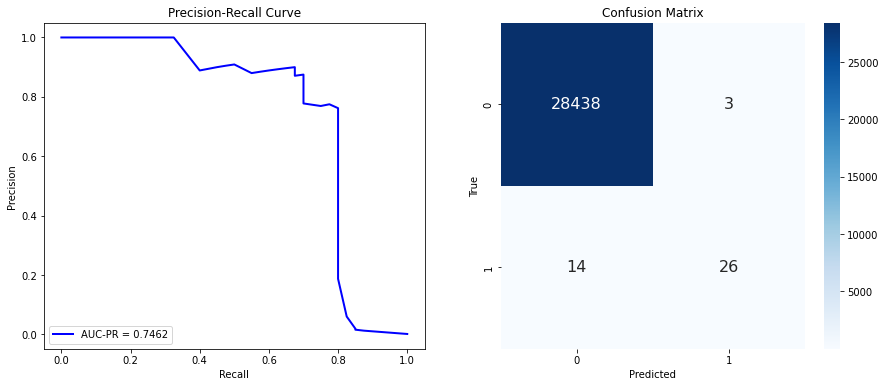


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.90      0.65      0.75        40

    accuracy                           1.00     28481
   macro avg       0.95      0.82      0.88     28481
weighted avg       1.00      1.00      1.00     28481



In [577]:
eval_model(gb)

For the tree-based models, the random forest model outperforms all of the logistic regression models. The random forest models has an AUC-PR of 0.7570 while the best logistic regression model has an AUC-PR of 0.7131. The gradient boosting model offers a similar amount of improvement with an AUC-PR of 0.7462.

# Neural network model

I'll also try to use a neural network to see if that can do better at detecting fraud.

In [579]:
import keras
import keras_tuner

In [596]:
# define the hypermodel
def build_model(hp):
    model = keras.Sequential()
    
    layer1 = keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))
    model.add(layer1)

    num_middle_layers = hp.Choice('num_middle_layers', [1, 2, 3, 4, 5])
    for i in range(num_middle_layers):
        model.add(keras.layers.Dense(hp.Choice(f'units{i+1}', [16, 32, 64, 128]),
                              activation='relu'))
        model.add(keras.layers.Dropout(hp.Choice(f'dropout{i+1}',
                                [0.0, 0.1, 0.2, 0.3, 0.4])))
        if hp.Boolean(f'batch{i+1}'):
              model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    learning_rate = 0.001
    model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(curve='PR')])
    return model
     

# set up the Bayesian optimization tuner
tuner = keras_tuner.BayesianOptimization(
    build_model,
    objective = keras_tuner.Objective("val_auc", direction="max"),
    max_trials = 20,
    directory = 'nn_tuner'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
best_nn_model = tuner.get_best_models()[0]

Trial 20 Complete [00h 03m 44s]
val_auc: 0.7822039723396301

Best val_auc So Far: 0.7965686321258545
Total elapsed time: 01h 52m 14s


In [597]:
# get architecture of the best neural network model
best_nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8129 (31.75 KB)
Trainable params: 8129 (31.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [598]:
# get hyperparameters of the best neural network model
best_nn_model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 30),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 30),
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'inp

In [599]:
# Train the best neural network model further
best_nn_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
7121/7121 [==============================] - 6823s 958ms/step - loss: 0.0023 - auc: 0.8728 - val_loss: 0.0034 - val_auc: 0.7909
Epoch 2/10
7121/7121 [==============================] - 36s 5ms/step - loss: 0.0020 - auc: 0.8860 - val_loss: 0.0035 - val_auc: 0.7606
Epoch 3/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.0019 - auc: 0.8960 - val_loss: 0.0036 - val_auc: 0.8013
Epoch 4/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.0018 - auc: 0.9040 - val_loss: 0.0042 - val_auc: 0.7804
Epoch 5/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.0018 - auc: 0.9087 - val_loss: 0.0037 - val_auc: 0.8023
Epoch 6/10
7121/7121 [==============================] - 39s 5ms/step - loss: 0.0017 - auc: 0.9178 - val_loss: 0.0039 - val_auc: 0.7587
Epoch 7/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.0015 - auc: 0.9209 - val_loss: 0.0040 - val_auc: 0.7684
Epoch 8/10
7121/7121 [=============================

891/891 [==============================] - 3s 3ms/step


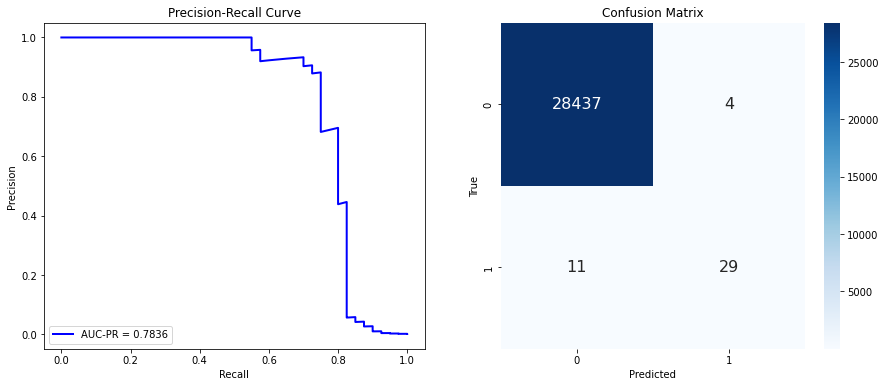


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.88      0.72      0.79        40

    accuracy                           1.00     28481
   macro avg       0.94      0.86      0.90     28481
weighted avg       1.00      1.00      1.00     28481



In [600]:
eval_model(best_nn_model)

The neural network is the best model with an AUC-PR of 0.7836. 

# Test final model

Since the neural network model performed the best with the validation set, that'll be the model that gets tested with the test set.

891/891 [==============================] - 3s 3ms/step


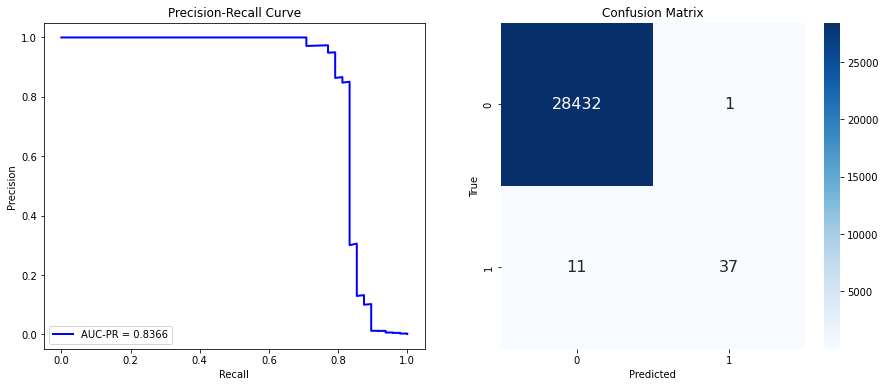


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28433
           1       0.97      0.77      0.86        48

    accuracy                           1.00     28481
   macro avg       0.99      0.89      0.93     28481
weighted avg       1.00      1.00      1.00     28481



In [601]:
y_pred_proba = best_nn_model.predict(X_test).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# plotting precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
axes[0].plot(recall, precision, color='blue', lw=2, label=f'AUC-PR = {auc_pr:.4f}')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve')
axes[0].legend(loc='lower left')

# plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix')

plt.show()

print("\nClassification Report:\n", classification_rep)

The neural network model achieved an AUC-PR of 0.8366 on the test set. It was able to detect 77% of the fraudulent transactions while only incorrectly classifying 1 transaction as fraudulent out of the 28433 valid transactions. According to the Precision-Recall curve, if we lower the classification threshold, we can detect more than 80% of the fraudulent transactions at the expense of incorrectly classifying a few more of the valid transactions. 